Text(0.5, 1.0, 'Quantidade de GPU por modelo')

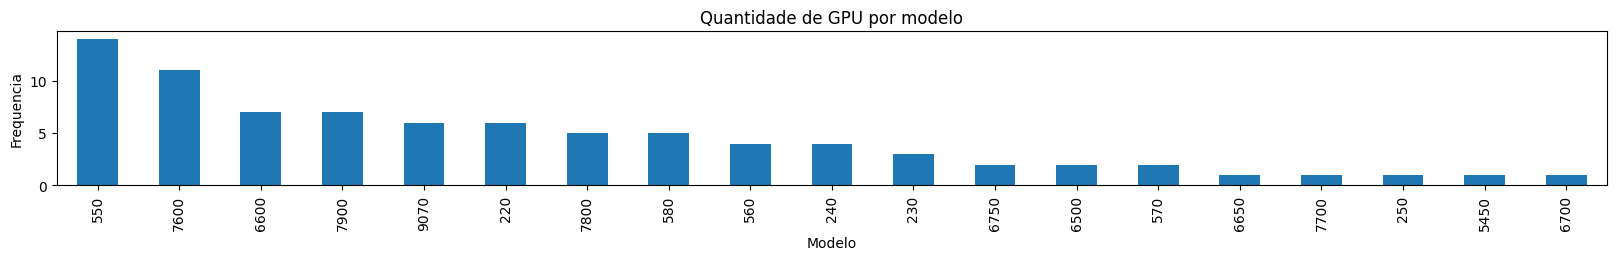

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel("GPUAMD.xlsx")
dicPlacas = ["6600","6650","7900","9070","550","7600","220","6500","7700","580","7800","250","240","9070","470","6500","570","560","7600","500","5450","6700","230","6750"]
gddrs = ["GDDR5","GDDR6","DDR3"]
gbs = ["2GB","16GB","8GB","4GB","24GB","12GB","1GB","6GB"]
df["marca"] = df["marca"].str.lower().str.replace("rx","rx ").str.replace('xt'," xt")
df["preco"] = df["preco"].str.replace(".","").str.replace(",",".").str.replace("R$","").str.replace(" ","")
df["preco"] = df["preco"].astype("float")
def Extrair_Modelo(texto):
    for placa in dicPlacas:
        if placa.lower() in texto.lower():
            return placa.lower()
        
def xt(texto):
    if "xt" in texto or "xtx" in texto:
        return True
    else:
        return False
    
def gddr(texto):
    for gddr in gddrs:
        if gddr in texto.upper():
            return gddr

def gb(texto):
    for gb in gbs:
        if gb in texto.upper():
            return gb

df["modelo"] = df["marca"].apply(Extrair_Modelo) 
df["XT"] = df["marca"].apply(xt)
df["GDDR"] = df["marca"].apply(gddr)
df["GB"] = df["marca"].apply(gb)

model_count = df["modelo"].value_counts()
plt.figure(figsize=(20,2))
model_count.plot(kind="bar")
plt.xlabel("Modelo")
plt.ylabel("Frequencia")
plt.title("Quantidade de GPU por modelo")

   

Text(0.5, 1.0, 'Quantidade de GPU por GDDR')

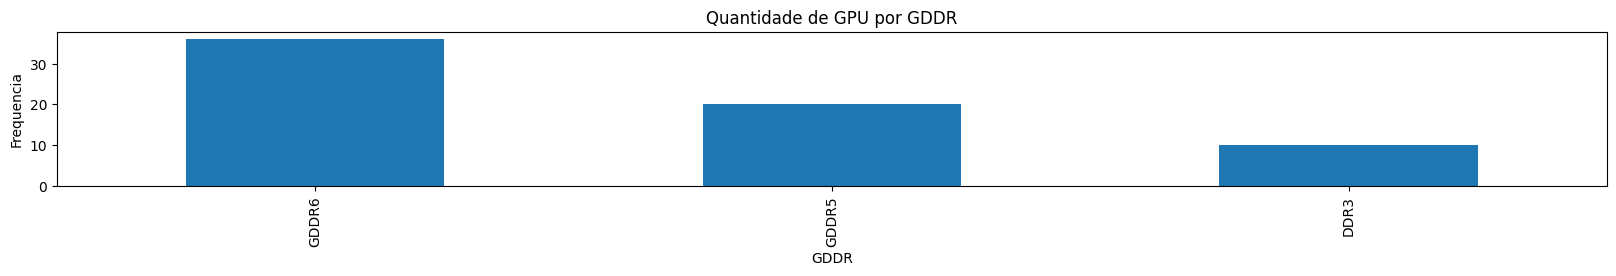

In [4]:
model_count = df["GDDR"].value_counts()
plt.figure(figsize=(20,2))
model_count.plot(kind="bar")
plt.xlabel("GDDR")
plt.ylabel("Frequencia")
plt.title("Quantidade de GPU por GDDR")

Text(0.5, 1.0, 'Quantidade de GPU por GB')

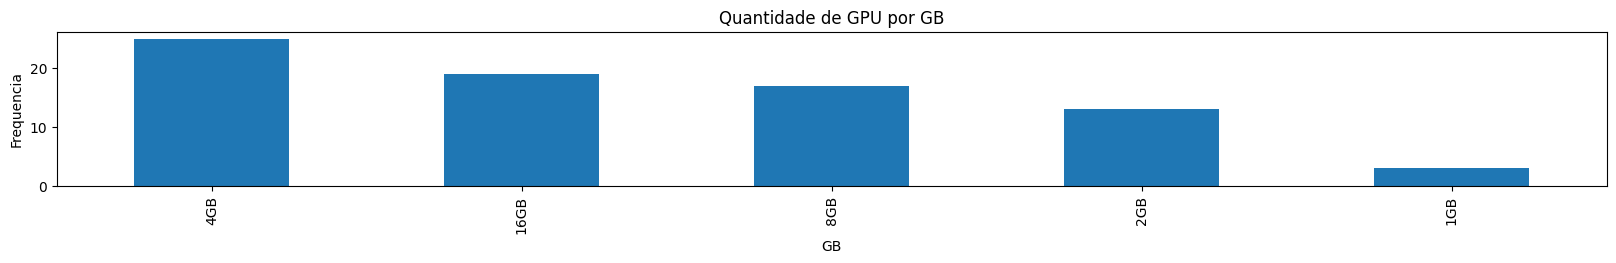

In [5]:
model_count = df["GB"].value_counts()
plt.figure(figsize=(20,2))
model_count.plot(kind="bar")
plt.xlabel("GB")
plt.ylabel("Frequencia")
plt.title("Quantidade de GPU por GB")

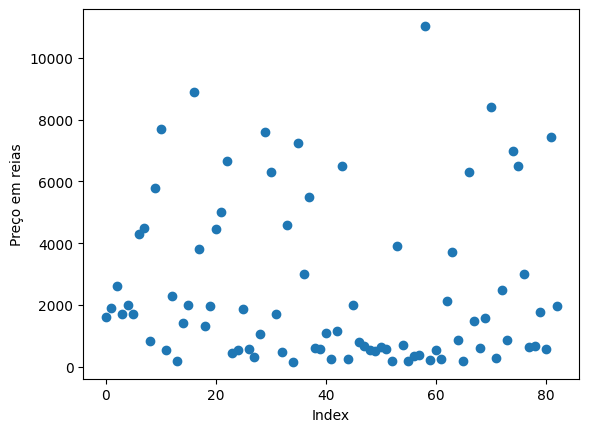

In [6]:
x = df["preco"].sort_values().values
y = df["preco"].sort_values().index
plt.ylabel("Preço em reias")
plt.xlabel("Index")
plt.scatter(y,x)

In [7]:
def upgrade(x,y):
    if x == True:
        return int(y)+105
    else:
        return y
df["modelo"] = df.apply(lambda x: upgrade(x["XT"],x["modelo"]), axis=1)

Index([  6605,   6755,   6805,   6855,   7705,   7805,   7905,   8005,   9175,
        '220',  '230',  '240',  '250', '5450',  '550',  '560',  '570',  '580',
       '6600', '7600', '7900', '9070'],
      dtype='object', name='modelo')


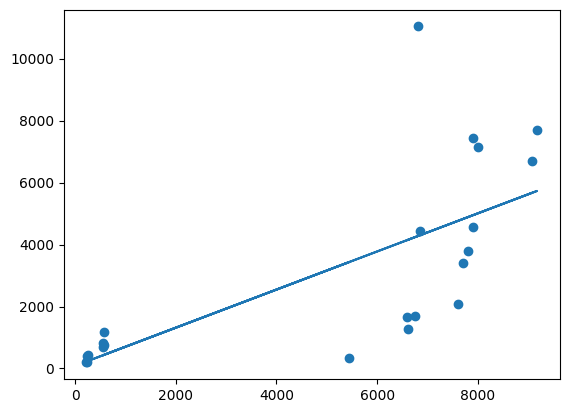

In [8]:
from sklearn.linear_model import LinearRegression
import numpy as np
valores_int = [int(i) for i in dicPlacas]
X = np.array(valores_int).reshape(-1, 1)
y = df.groupby("modelo")["preco"].sum()/df.groupby("modelo")["preco"].count()
x=np.array(y.index.astype("int")).reshape(-1,1)
print(y.index)
reg_lin = LinearRegression()
reg_lin.fit(x,y.values)

a_coef = reg_lin.coef_
b_coef = reg_lin.intercept_
plt.scatter(x,y.values)
plt.plot(x,b_coef+a_coef*x)
plt.show()

<Axes: >

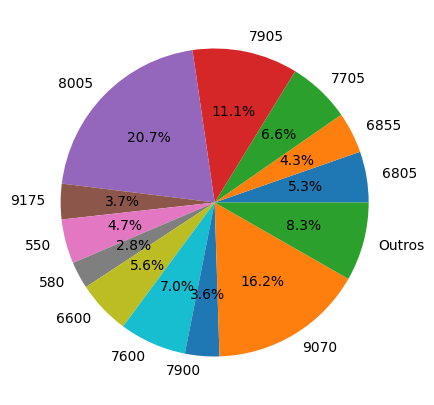

In [9]:
plt.figure(figsize=(5,5))
preco_modelo = df.groupby("modelo")["preco"].sum()
porcentagem = preco_modelo/preco_modelo.sum()
modelos_filtrado = porcentagem[porcentagem>0.02]
menores = porcentagem[porcentagem<=0.02]
modelos_filtrado_outro =  modelos_filtrado.copy()
modelos_filtrado_outro["Outros"] = menores.sum()
modelos_filtrado_outro.plot(kind="pie",autopct="%1.1f%%",legend=False,ylabel="")

<Axes: xlabel='Fabricante'>

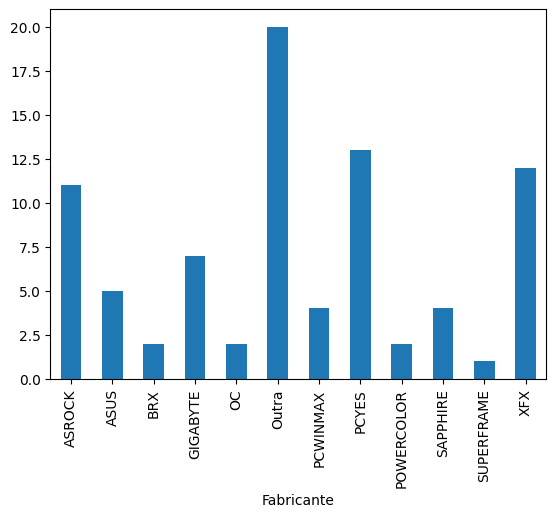

In [10]:
fabricantes = [
    'ASROCK', 'XFX', 'POWERCOLOR', 'SAPPHIRE', 'GIGABYTE',
    'MSI', 'ASUS', 'YESTON', 'HIS', 'BIOSTAR', 'VISIONTEK',
    'DELL', 'HP', 'LENOVO', 'APPLE', 'FOXCONN', 'ZOTAC',
    'PNY', 'EVGA',"PCWINMAX","PCYES","OC","SUPERFRAME","BRX",
]
def fabricante(texto):
    for fabricante in fabricantes:
        if fabricante in texto.upper():
            return fabricante
    return "Outra"
df["Fabricante"] = df["marca"].apply(fabricante)
df.groupby("Fabricante")["marca"].count().plot(kind='bar')

In [11]:
dfvalormediopormodelo = df.groupby('modelo')["preco"].mean()
dfvalormediopormodelo

modelo
6605     1271.490000
6755     1699.990000
6805    11039.200000
6855     4449.595000
7705     3404.865000
7805     3799.990000
7905     4568.658000
8005     7141.488333
9175     7699.990000
220       193.658333
230       212.166667
240       402.657500
250       439.990000
5450      336.000000
550       686.540000
560       835.052500
570       749.495000
580      1173.508000
6600     1657.072857
7600     2076.215714
7900     7439.990000
9070     6708.990000
Name: preco, dtype: float64

In [12]:
dfvalormedioxt = df.groupby("XT")["preco"].mean()
dfvalormedioxt

XT
False    1527.022167
True     4999.696522
Name: preco, dtype: float64

In [13]:
dfvalorgb = df.groupby("GB")["preco"].mean()
dfvalorgb

GB
16GB    4689.175263
1GB      242.830000
2GB     2010.309231
4GB     1262.170400
8GB     1797.640588
Name: preco, dtype: float64

In [14]:
dfvalorddgr = df.groupby("GDDR")["preco"].mean()
dfvalorddgr

GDDR
DDR3      213.445000
GDDR5     761.596500
GDDR6    4106.241944
Name: preco, dtype: float64

In [15]:
reg_lin.predict(np.array([5000,6000,7000]).reshape(-1,1))

array([3162.03555894, 3777.31017571, 4392.58479248])

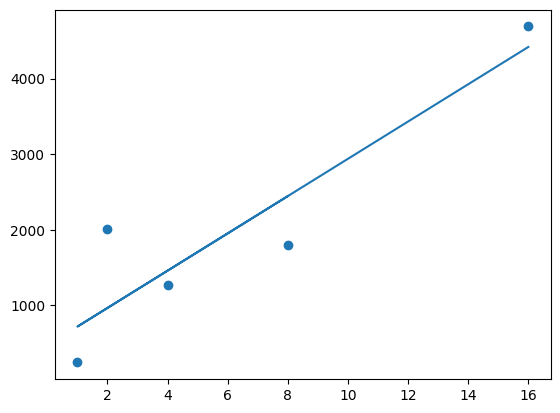

In [21]:

y = df.groupby("GB")["preco"].sum()/df.groupby("GB")["preco"].count()
y.index.str.replace("GB","")
x=np.array(y.index.str.replace("GB","").astype("int")).reshape(-1,1)
reg_lin = LinearRegression()
reg_lin.fit(x,y.values)

a_coef = reg_lin.coef_
b_coef = reg_lin.intercept_
plt.scatter(x,y.values)
plt.plot(x,b_coef+a_coef*x)
plt.show()


In [ ]:

valores_int = [int(i) for i in gbs]
y = df.groupby("GB")["preco"].sum()/df.groupby("modelo")["preco"].count()
x=np.array(y.index.str.replace("GB","").astype("int")).reshape(-1,1)
reg_lin = LinearRegression()
reg_lin.fit(x,y.values)

a_coef = reg_lin.coef_
b_coef = reg_lin.intercept_
plt.scatter(x,y.values)
plt.plot(x,b_coef+a_coef*x)
plt.show()
